# SVM for classification

Load IRIS dataset, check its contents:

In [40]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [41]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [42]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [43]:
X_selected = iris.data[:, :2]
y_selected = iris.target[iris.target != 2]

# Splitting the data into training and testing parts
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X, y, test_size=0.2)

# Training the SVM model
SVMmodel = SVC(kernel='linear')
SVMmodel.fit(X_train_selected, y_train_selected)

# Evaluating the model
accuracy = SVMmodel.score(X_test_selected, y_test_selected)
print("Accuracy:", accuracy)

Accuracy: 1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

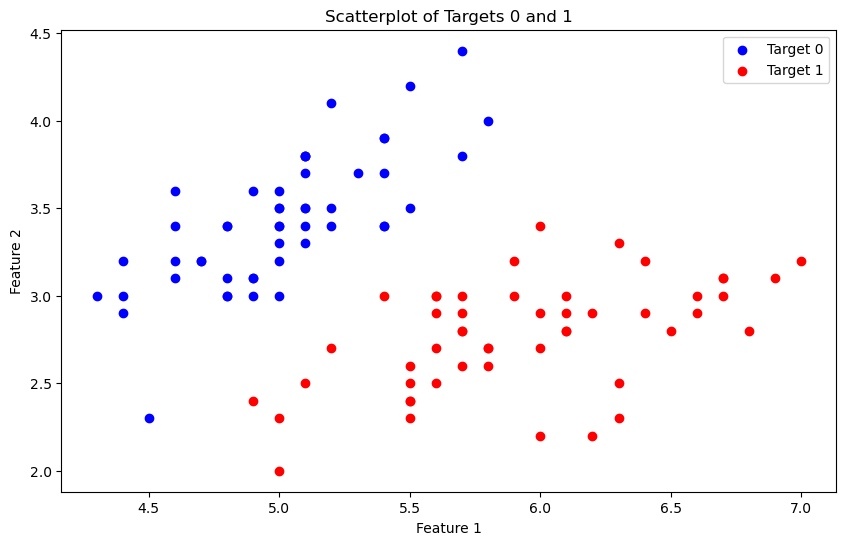

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrer les données pour inclure uniquement les classes 0 et 1
indices = np.where(y_selected < 2)
X_filtered = X_selected[indices]
y_filtered = y_selected[indices]

# Séparer les données en fonction des classes
X_target_0 = X_filtered[y_filtered == 0]
X_target_1 = X_filtered[y_filtered == 1]

# Tracer le nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(X_target_0[:, 0], X_target_0[:, 1], color='blue', label='Target 0')
plt.scatter(X_target_1[:, 0], X_target_1[:, 1], color='red', label='Target 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot of Targets 0 and 1')
plt.legend()
plt.show()


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Charger le jeu de données IRIS
iris = load_iris()
X = iris.data
y = iris.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le classifieur SVM avec le paramètre de régularisation C par défaut
SVM_default = SVC()
SVM_default.fit(X_train, y_train)

# Évaluer les performances avec le paramètre de régularisation C par défaut
accuracy_default = SVM_default.score(X_test, y_test)
print("Accuracy with default C:", accuracy_default)

# Entraîner le classifieur SVM avec un paramètre de régularisation C différent (par exemple, C=200)
SVM_C_200 = SVC(C=200)
SVM_C_200.fit(X_train, y_train)

# Évaluer les performances avec le paramètre de régularisation C=200
accuracy_C_200 = SVM_C_200.score(X_test, y_test)
print("Accuracy with C=200:", accuracy_C_200)

Accuracy with default C: 1.0
Accuracy with C=200: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

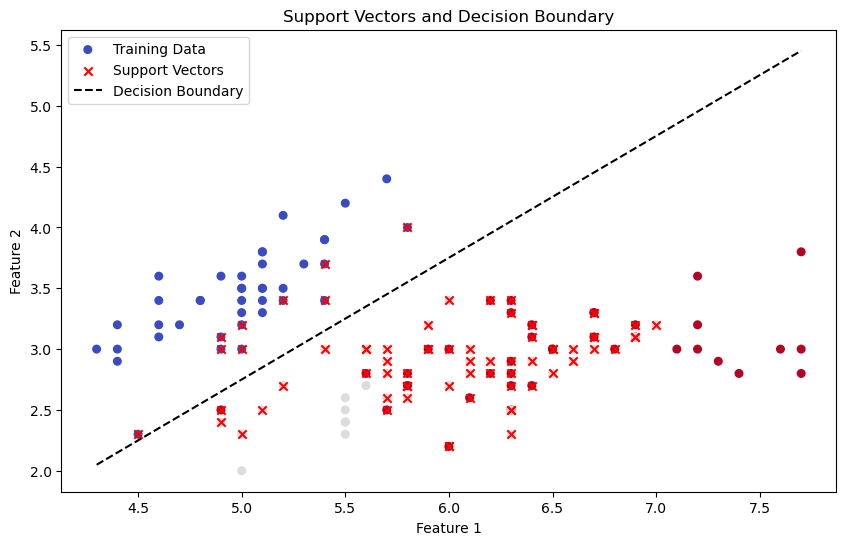

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Charger le jeu de données IRIS
iris = load_iris()
X = iris.data[:, :2]  # Sélectionner uniquement les deux premières caractéristiques pour une visualisation 2D
y = iris.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le classifieur SVM avec le paramètre de régularisation C par défaut
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, y_train)

# Afficher les vecteurs de support dans le nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=30, label='Training Data')
plt.scatter(SVM_model.support_vectors_[:, 0], SVM_model.support_vectors_[:, 1], color='red', marker='x', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Tracer la ligne de décision
w = SVM_model.coef_[0]
b = SVM_model.intercept_[0]
x_min = X_train[:, 0].min()
x_max = X_train[:, 0].max()
y_min = (-w[0] * x_min - b) / w[1]
y_max = (-w[0] * x_max - b) / w[1]
plt.plot([x_min, x_max], [y_min, y_max], 'k--', label='Decision Boundary')

plt.title('Support Vectors and Decision Boundary')
plt.legend()
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

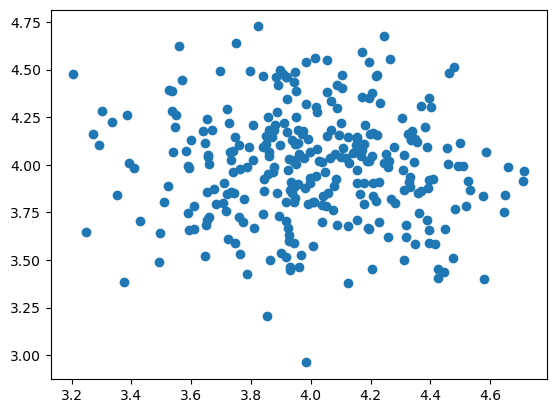

In [47]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

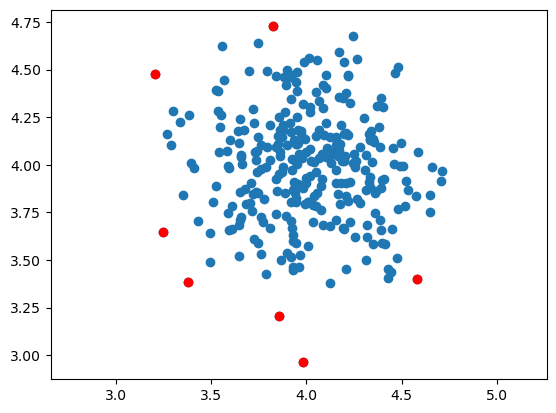

In [48]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

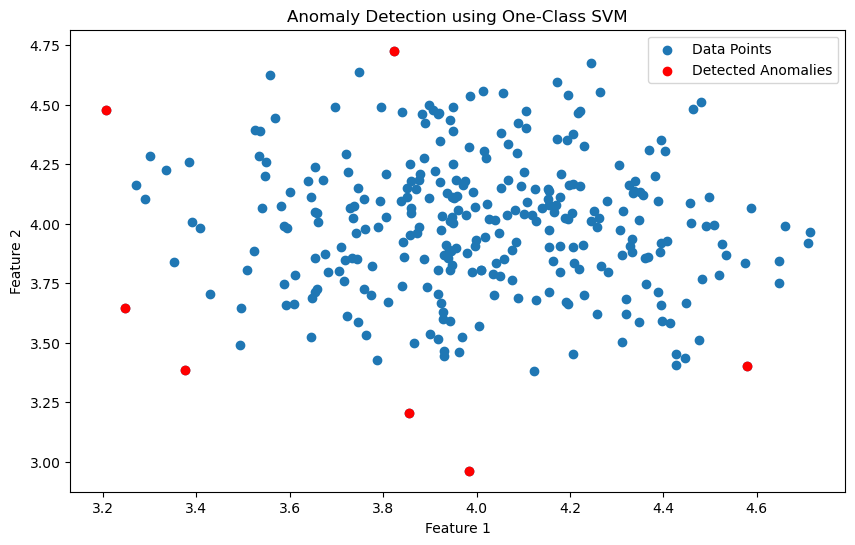

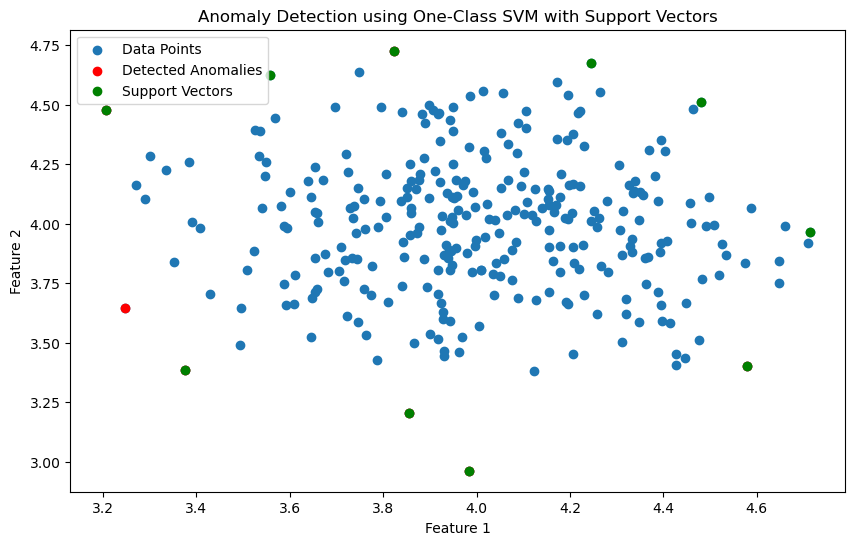

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs

# Générer les données de manière aléatoire
np.random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

# Créer et entraîner le modèle SVM à une classe
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)

# Prédire les anomalies
pred = SVMmodelOne.predict(x)
anom_index = np.where(pred==-1)
anomalies = x[anom_index]

# Tracer les points de données et les anomalies détectées
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], label='Data Points')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Detected Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection using One-Class SVM')
plt.legend()
plt.show()

# Tracer les vecteurs de support
support_vectors = SVMmodelOne.support_vectors_
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], label='Data Points')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Detected Anomalies')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='green', marker='o', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection using One-Class SVM with Support Vectors')
plt.legend()
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


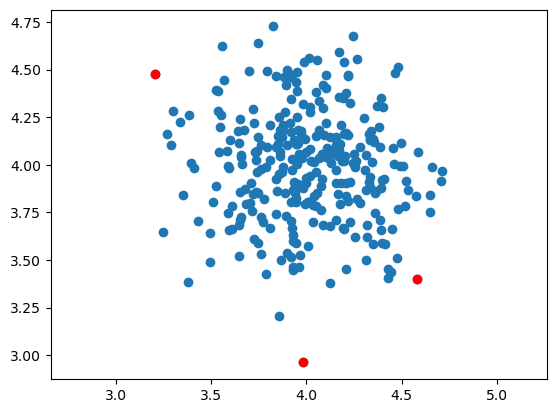

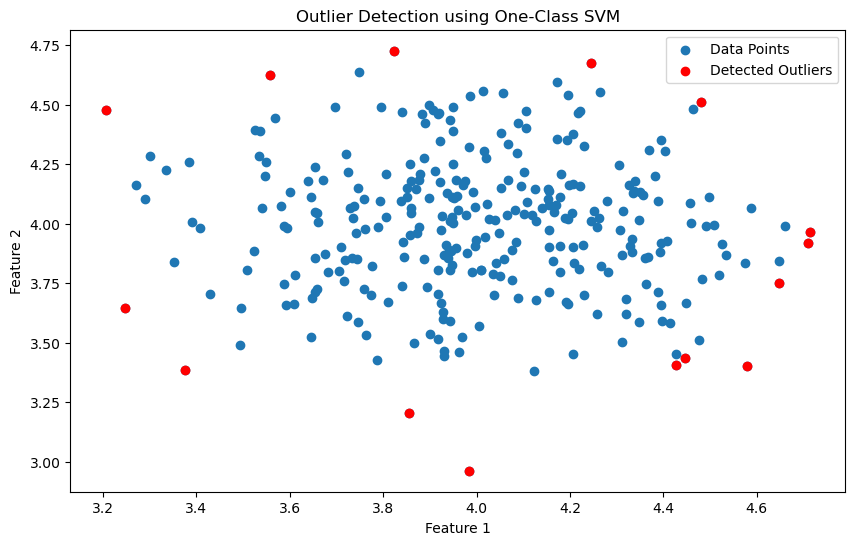

In [50]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs

# Générer les données de manière aléatoire
np.random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

# Créer et entraîner le modèle SVM à une classe
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)

# Obtenir les scores d'anomalie pour chaque point
scores = SVMmodelOne.score_samples(x)

# Définir le seuil en utilisant le quantile
thresh = np.quantile(scores, 0.05)

# Identifier les valeurs considérées comme des outliers
outliers_index = np.where(scores <= thresh)
outliers = x[outliers_index]

# Tracer les points de données et les outliers
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], label='Data Points')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Detected Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection using One-Class SVM')
plt.legend()
plt.show()

